## Goal:
### Explore the drug efficacy dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between features.

# 2. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# 3. Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\PanasaKamal\Data Analysis\Week_5_Assignment\csv_files\drug_efficacy.csv')
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [ ]:
avg_effectiveness = np.mean(df['Effective'])
print("Overall Average Effectiveness Score:", avg_effectiveness)

avg_satisfaction_by_condition = df.groupby('Condition')['Satisfaction'].mean()
print("\nAverage Patient Satisfaction by Condition:\n", avg_satisfaction_by_condition)

avg_ease_by_drug = df.groupby('Drug')['EaseOfUse'].mean()
print("\nAverage Ease of Use by Drug:\n", avg_ease_by_drug)

Overall Average Effectiveness Score: 3.5579720594862554

Average Patient Satisfaction by Condition:
 Condition
Acute Bacterial Sinusitis                    2.815385
Atopic Dermatitis                            3.491627
Bacterial Conjunctivitis                     2.764762
Bacterial Urinary Tract Infection            2.560229
Infantile Autism                             2.829000
Influenza                                    2.565000
Pharyngitis due to Streptococcus Pyogenes    2.696386
Sleepiness Due To Obstructive Sleep Apnea    3.785000
adenocarcinoma of pancreas                   2.937333
back pain                                    3.545366
biliary calculus                             4.152500
chickenpox                                   4.127500
colorectal cancer                            3.000000
depression                                   3.366250
diverticulitis of gastrointestinal tract     2.339167
edema                                        2.669024
endometriosis            

### Insights:

1. The Overall Average Effectiveness Score provides a baseline for patient perception across the entire dataset, which is necessary for benchmarking specific drug scores.

2. Average Satisfaction by Condition reveals which medical areas are associated with better patient outcomes and experiences.

3. Average Ease of Use by Drug helps identify whether the specific drug compound or delivery method significantly impacts user experience.

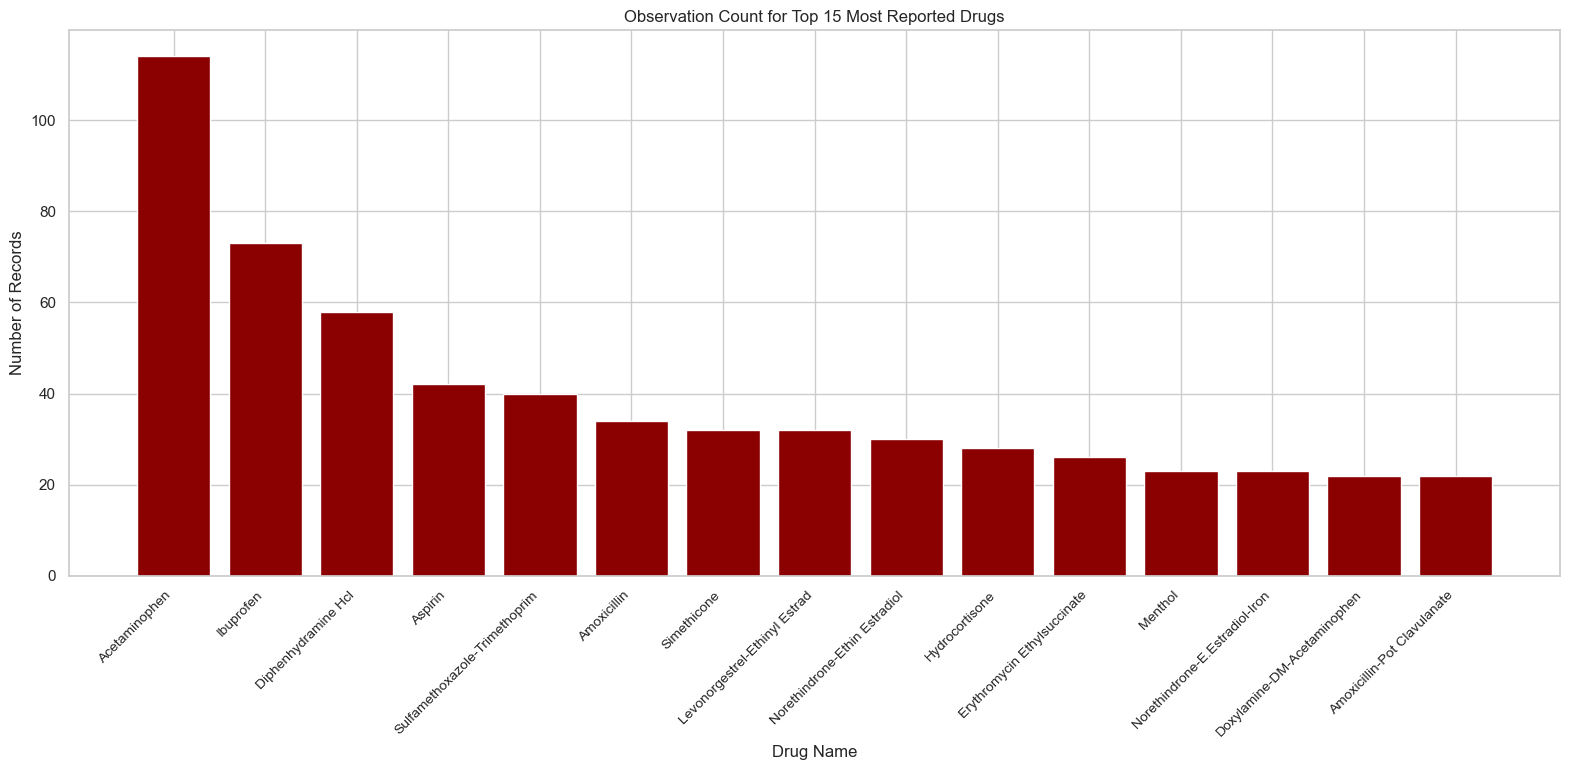

In [18]:
observation_count_by_drug = df.groupby('Drug')['Condition'].count()

top_15_drugs = observation_count_by_drug.nlargest(15).index

df_top_15 = df[df['Drug'].isin(top_15_drugs)]
sorted_counts = df_top_15.groupby('Drug')['Condition'].count().sort_values(ascending=False)
drugs = sorted_counts.index
counts = sorted_counts.values

plt.figure(figsize=(16, 8))
plt.bar(drugs, counts, color='darkred')
plt.title("Observation Count for Top 15 Most Reported Drugs")
plt.xlabel("Drug Name")
plt.ylabel("Number of Records")

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout(pad=1.5)
plt.show()

### Insights:

1. This chart will immediately highlight the drugs with the highest volume of patient reports (the tallest bars), confirming which treatments have the most robust data for reliability.

2. By sorting the bars, you can easily identify the top-reported drugs in the dataset, which is useful for focusing deeper analysis or visualization efforts.

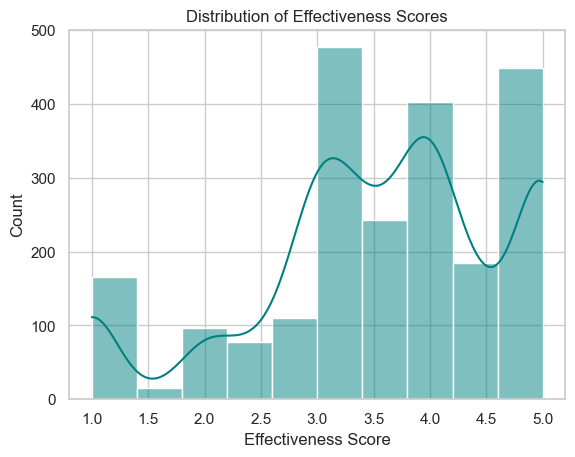

In [6]:
# Histogram of the core numerical feature: Effectiveness Score
sns.histplot(df['Effective'], bins=10, kde=True, color='teal')
plt.title("Distribution of Effectiveness Scores")
plt.xlabel("Effectiveness Score")
plt.show()

### Insights:

1. The histogram reveals the central tendency and skewness of the patient-reported Effective scores, indicating whether the majority of feedback is positive (scores clustered near 5) or negative (scores clustered near 1).

2. The visualization is crucial for understanding the distribution's shape, confirming if scores are clustered around a specific rating or if they show a bimodal pattern, suggesting two distinct groups of patients with very different experiences.

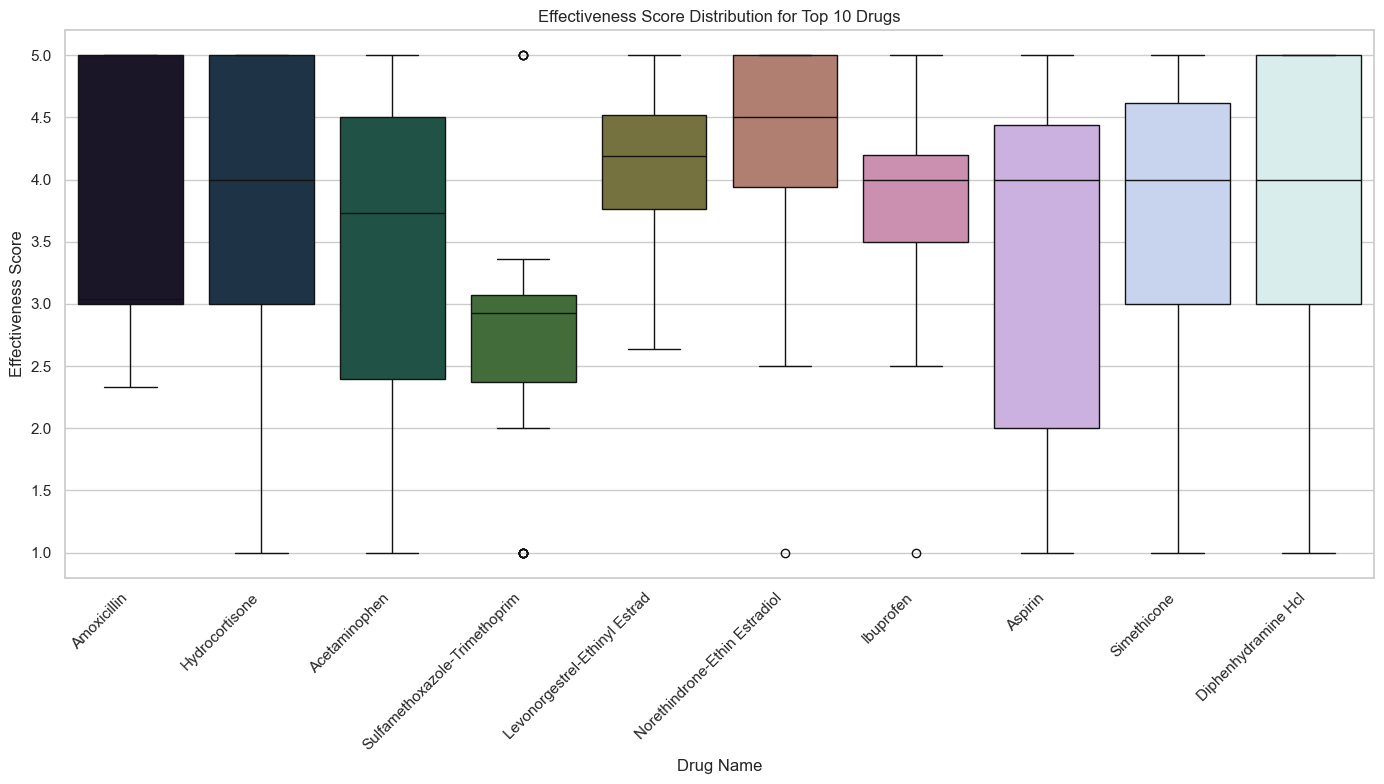

In [19]:
# Corrected Box Plot Code to eliminate FutureWarning
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Drug',
    y='Effective',
    data=df_top_drugs,
    # FIX 1: Assign the 'Drug' variable to 'hue'
    hue='Drug',
    palette='cubehelix',
    # FIX 2: Set legend=False since hue is redundant with x
    legend=False
)
plt.title("Effectiveness Score Distribution for Top 10 Drugs")
plt.xlabel("Drug Name")
plt.ylabel("Effectiveness Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights:

1. Visualization Insights (Box Plot of Effectiveness Scores)
The chart provides a direct performance comparison, clearly identifying which of the top 10 most-reviewed drugs has the highest and lowest median effectiveness score.

2. It visualizes the consistency of patient feedback for each drug, showing which treatments have the tightest distribution (most reliable score) and which have high variability (wide spread and many outliers).

3. By concentrating the analysis on the top 10 drugs by review count, the insights gained regarding median performance and score consistency are focused on the most statistically robust subset of the patient data.

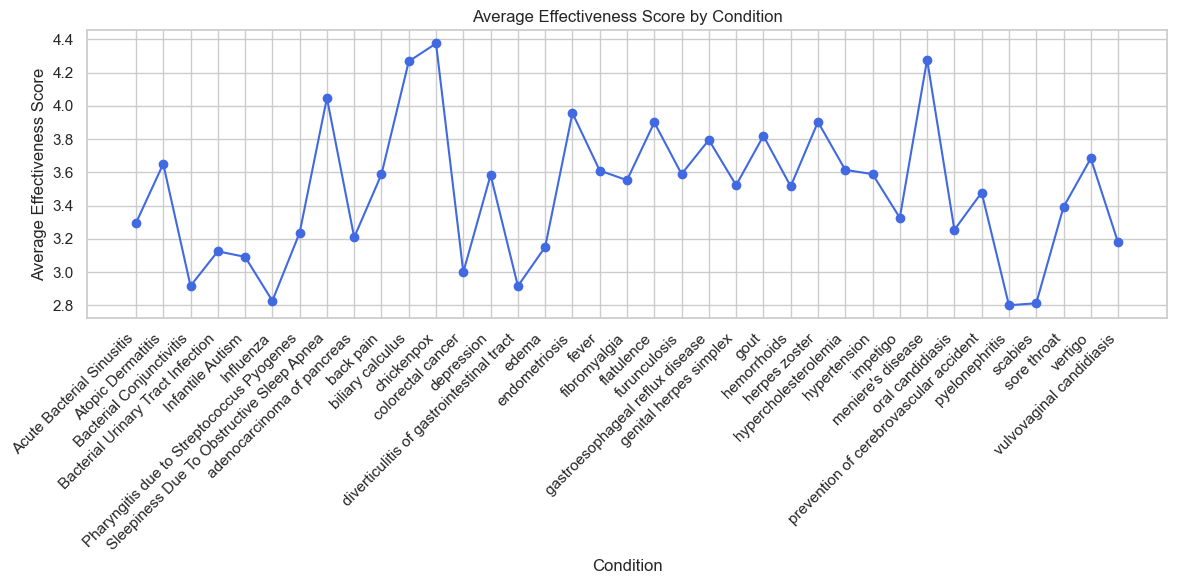

In [10]:
# Calculate the average Effectiveness score for each Condition
avg_effective_by_condition = df.groupby('Condition')['Effective'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_effective_by_condition.index, avg_effective_by_condition.values, marker='o', color='royalblue')
plt.title("Average Effectiveness Score by Condition")
plt.xlabel("Condition")
plt.ylabel("Average Effectiveness Score")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:
1. The plot allows for the comparison of average drug effectiveness across different medical conditions, revealing where treatments are generally perceived as highly effective.

2. It quickly identifies conditions where the overall treatment regimen has the highest and lowest average success scores.

<Figure size 1200x1200 with 0 Axes>

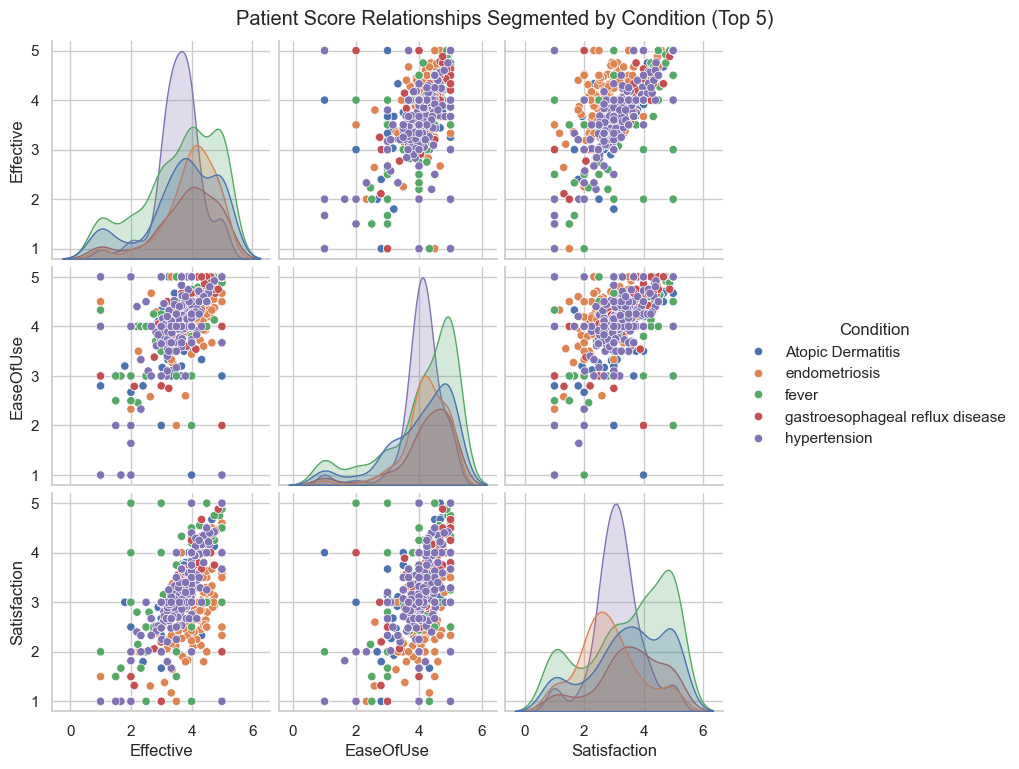

In [14]:
# To keep the plot manageable, we first filter for the top 5 Conditions with the most data.
top_conditions = df['Condition'].value_counts().nlargest(5).index
df_top_conditions = df[df['Condition'].isin(top_conditions)]

plt.figure(figsize=(12, 12))
sns.pairplot(
    df_top_conditions,
    vars=['Effective', 'EaseOfUse', 'Satisfaction'],
    hue='Condition',
    diag_kind='kde'
)
plt.suptitle("Patient Score Relationships Segmented by Condition (Top 5)", y=1.02)
plt.show()

### Insights:

1. Score Interrelationships (Off-Diagonal Scatter Plots): The scatter plots will reveal if scores are correlated (e.g., does a higher Effective score always correspond to a higher Satisfaction score, and does this relationship hold true across all five conditions?).

2. Distribution Comparison (Diagonal KDE Plots): The diagonal plots will show the overall distribution of each individual score, with the segmentation by Condition revealing if one condition's treatment tends to cluster patients at high scores (e.g., peak KDE near 5.0) or low scores.

3. Condition-Specific Bias: This visual will help identify if a specific medical Condition is systematically associated with low EaseOfUse scores, suggesting a common difficulty in administering treatment for that condition, regardless of the drug.

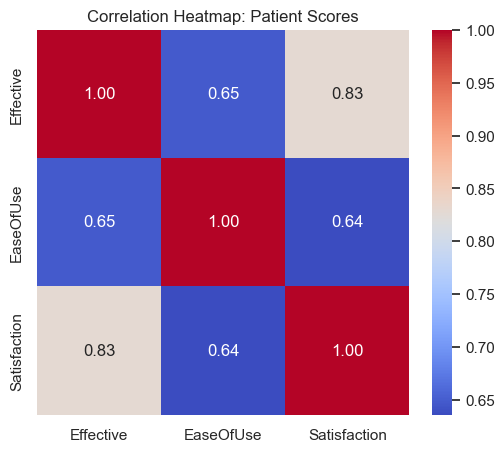

In [8]:
# Correlation Heatmap for the three primary numerical scores
corr = df[['Effective', 'EaseOfUse', 'Satisfaction']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Patient Scores")
plt.show()

### Insights:

1. The heatmap reveals the linear relationship between the patient-reported scores. For example, it will show if Effective has a strong positive correlation with Satisfaction.

2. A strong correlation between EaseOfUse and Satisfaction would suggest that a drug's user-friendliness is a major driver of overall patient happiness.